Data Understanding & Preparation:

Step 1: Download the Dataset

In [87]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data -P ../data/classification_dataset

--2023-12-15 11:58:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 

128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘../data/classification_dataset/wine.data’

wine.data               [ <=>                ]  10.53K  --.-KB/s    in 0s      

2023-12-15 11:58:21 (29.1 MB/s) - ‘../data/classification_dataset/wine.data’ saved [10782]



Step 2: Imports

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import IsolationForest

Step 3: Load and Explore the Dataset

In [89]:
# Load the dataset
url = "../data/classification_dataset/wine.data"
column_names = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",
                "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue",
                "OD280/OD315 of diluted wines", "Proline"]

wine_data = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the dataset
print(wine_data.head())

   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

Step 4: Check for Missing Values and Explore Summary Statistics

In [90]:
# Check for missing values
print(wine_data.isnull().sum())

# Explore summary statistics
print(wine_data.describe())

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64
            Class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000  

Step 5: Visualize the Distribution of Wine Classes

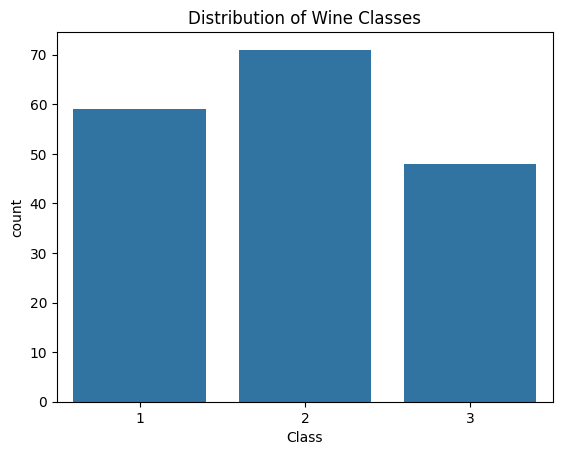

In [91]:
# Visualize the distribution of wine classes
sns.countplot(x='Class', data=wine_data)
plt.title('Distribution of Wine Classes')
plt.savefig('../plots/decision-tree/wine_distribution.png')
plt.show()

Step 6: Data Preparation

In [92]:
# Split the data into features (X) and target variable (y)
X = wine_data.drop('Class', axis=1)
y = wine_data['Class']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns (if any)
categorical_columns = []  # Add the actual column names if categorical

# Identify numerical columns
numerical_columns = X.columns.difference(categorical_columns)

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Transform the data
X_processed = preprocessor.fit_transform(X)

Modeling:

Step 7: Decision Trees

Decision Tree Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.93      1.00      0.97        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Confusion Matrix:
 [[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]


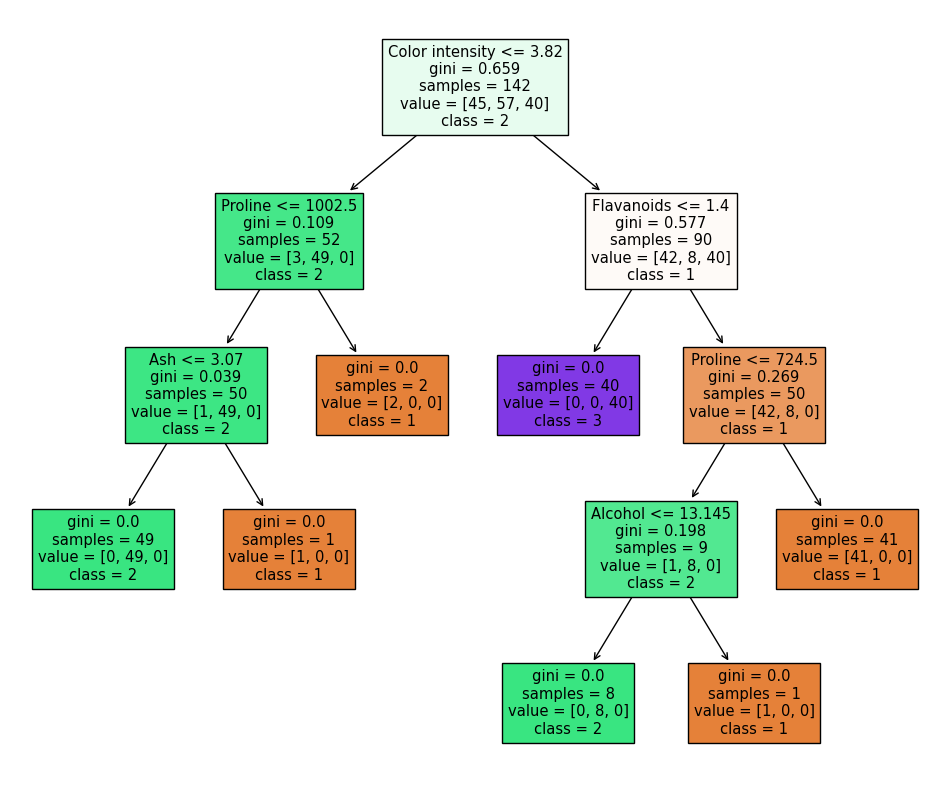

In [93]:
# Create and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# Visualize the Decision Tree and save as an image
plt.figure(figsize=(12, 10))
tree.plot_tree(dt_classifier, feature_names=X.columns, class_names=[str(i) for i in range(1, 4)], filled=True)
plt.savefig('../plots/decision-tree/decision_tree_visualization.png')
plt.show()

Step 8: Feature Engineering

In [94]:
# Create a new feature representing the total flavonoids
X['TotalFlavonoids'] = X['Flavanoids'] + X['Nonflavanoid phenols']

In [95]:
# Perform dimensionality reduction using PCA
pca = PCA(n_components=10)  # Choose an appropriate number of components
X_pca = pca.fit_transform(X_processed)

#### Model Evaluation and Comparison

Create and train additional classifiers

In [96]:
rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)

Evaluate and compare the performance of different classifiers

DecisionTreeClassifier Accuracy: 0.9444444444444444
Classification Report for DecisionTreeClassifier:
               precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.93      1.00      0.97        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Confusion Matrix for DecisionTreeClassifier:
 [[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]


RandomForestClassifier Accuracy: 1.0
Classification Report for RandomForestClassifier:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg     

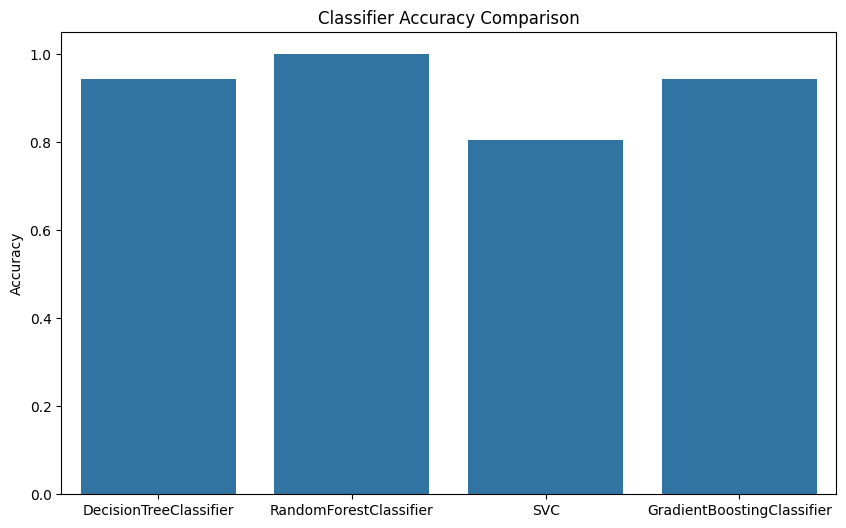

In [97]:
classifiers = [dt_classifier, rf_classifier, svm_classifier, gb_classifier]
accuracy_scores = []
classifier_names = []

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    classifier_names.append(classifier.__class__.__name__)

    print(f"{classifier.__class__.__name__} Accuracy:", accuracy)
    print(f"Classification Report for {classifier.__class__.__name__}:\n", classification_report(y_test, y_pred))
    print(f"Confusion Matrix for {classifier.__class__.__name__}:\n", confusion_matrix(y_test, y_pred))
    print("\n")

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=classifier_names, y=accuracy_scores)
plt.title('Classifier Accuracy Comparison')
plt.ylabel('Accuracy')

# Save the plot
plt.savefig('../plots/decision-tree/classifier_accuracy.png')
plt.show()


Define the parameter grid for Decision Tree

In [98]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

Create the GridSearchCV object for Decision Tree

In [99]:
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [100]:
# Print the best parameters for Decision Tree
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


#### Cross-Validation

In [101]:
# Perform cross-validation on the Decision Tree model
cv_scores_dt = cross_val_score(dt_classifier, X, y, cv=5)
print("Cross-Validation Scores for Decision Tree:", cv_scores_dt)
print("Mean CV Accuracy for Decision Tree:", cv_scores_dt.mean())

Cross-Validation Scores for Decision Tree: [0.94444444 0.91666667 0.83333333 0.91428571 0.85714286]
Mean CV Accuracy for Decision Tree: 0.8931746031746032


Handling Class Imbalance (Example: Using SMOTE)

In [102]:
# Check for class imbalance in the target variable
class_distribution = y.value_counts()
print("Class Distribution:\n", class_distribution)

Class Distribution:
 Class
2    71
1    59
3    48
Name: count, dtype: int64


Use SMOTE for oversampling the minority classes

In [103]:
# Handling Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

#### Model Interpretability - SHAP (already added)

Advanced Visualization - Decision Boundaries (Using only two features)

In [104]:
# Choose two features for visualization
features_for_visualization = ['Alcohol', 'Flavanoids']
X_visualization = X_train[features_for_visualization].values

Train Decision Tree for visualization

In [105]:
dt_classifier_visualization = DecisionTreeClassifier(random_state=42)
dt_classifier_visualization.fit(X_visualization, y_train)

DecisionTreeClassifier(random_state=42)

#### Visualize decision boundaries

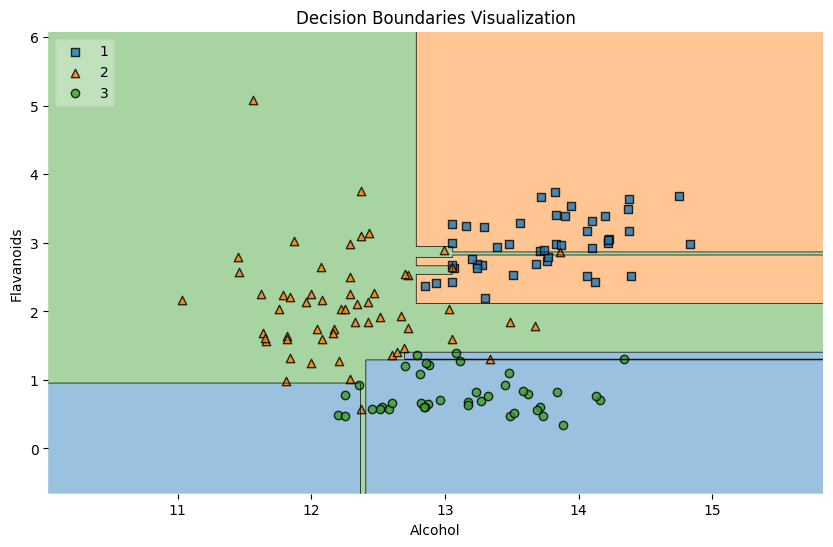

In [106]:
plt.figure(figsize=(10, 6))
plot_decision_regions(X_visualization, y_train.values, clf=dt_classifier_visualization, legend=2)
plt.title('Decision Boundaries Visualization')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.savefig('../plots/decision-tree/decision_boundaries_visualization.png')
plt.show()